In [ ]:
# Installing on Juypter Notebook

#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn

In [ ]:
# Installing Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

**Data Cleaning**

In [ ]:
# Dataset
df = pd.read_csv('clean_kaggle_data_2020.csv', low_memory=False)

# Remove question row
df = df.drop(df.index[0])

# Drop Salary column - want categorical data only
df = df.drop(columns=['Q24'])

In [ ]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
5,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto-Keras,Auto-Sklearn,Auto_ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10726,5461,35-39,Man,Thaila

In [ ]:
# Exclude columns with parts, then count number of null, must contain at least 5000 training examples
# Q1 - Age range (# years)
# Q2 - Gender
# Q3 - Residing country
# Q4 - Highest lv of education
# Q5 - Current job / position
# Q6 - Years in programming - range
# Q8 - Which programming language to learn first?
# Q11 - What computing platform do you use?
# Q13 - How many times have you used a TSU
# Q15 - How many years have you used ML methods? 
# Q20 - Size of company
# Q21 - How many individuals deal with Data science at workplace
# Q22 - Does current employer use ML
# Q25 - How much money has your company spent on ML
# Q30 - Which of the following big data products do you use? 
# Q32 - Which of the following business intelligence tools do you use? 
# Q38 - Which is the primary tool you use to analyze data?

# Using get dummies, we wil later seperate each unique value into a column, just like the columns with extra parts

df[['Q1', 'Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21','Q22','Q25','Q30','Q32','Q38']].isnull().sum(axis=0)

Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q8      561
Q11     561
Q13     561
Q15     561
Q20       0
Q21       0
Q22       0
Q25     159
Q30    7216
Q32    9231
Q38    1253
dtype: int64

In [ ]:
# By listing out the values of each category, we can see how to handle each missing value for the column
df['Q8'].value_counts(normalize=True)

Python        0.786979
R             0.078973
SQL           0.060779
C++           0.013769
C             0.012785
MATLAB        0.010327
Other         0.009835
Java          0.007868
Julia         0.007671
Javascript    0.005409
None          0.003245
Bash          0.001574
Swift         0.000787
Name: Q8, dtype: float64

In [ ]:
df['Q11'].value_counts(normalize=True)

A personal computer or laptop                                          0.747148
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)    0.163454
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)              0.061664
Other                                                                  0.014949
None                                                                   0.012785
Name: Q11, dtype: float64

In [ ]:
df['Q13'].value_counts(normalize=True)

Never                 0.692270
2-5 times             0.139851
Once                  0.118214
6-25 times            0.029996
More than 25 times    0.019670
Name: Q13, dtype: float64

In [ ]:
df['Q15'].value_counts(normalize=True)

Under 1 year                             0.298780
1-2 years                                0.218627
2-3 years                                0.122738
I do not use machine learning methods    0.103757
3-4 years                                0.075924
5-10 years                               0.073367
4-5 years                                0.068155
10-20 years                              0.022522
20 or more years                         0.016129
Name: Q15, dtype: float64

In [ ]:
df['Q25'].value_counts(normalize=True)

$0 ($USD)                  0.364806
$1000-$9,999               0.173037
$100-$999                  0.166887
$1-$99                     0.124598
$10,000-$99,999            0.101703
$100,000 or more ($USD)    0.068969
Name: Q25, dtype: float64

In [ ]:
df['Q30'].value_counts(normalize=True)

MySQL                                 0.217478
PostgresSQL                           0.148306
Microsoft SQL Server                  0.146029
MongoDB                               0.089098
Oracle Database                       0.073442
Google Cloud BigQuery                 0.059493
SQLite                                0.044406
Amazon Redshift                       0.036151
Microsoft Azure Data Lake Storage     0.033305
Other                                 0.025904
Amazon Athena                         0.021634
Snowflake                             0.020495
IBM Db2                               0.019072
Amazon DynamoDB                       0.018787
Google Cloud SQL                      0.017079
Microsoft Access                      0.015941
Google Cloud Firestore                0.013379
Name: Q30, dtype: float64

In [ ]:
df['Q32'].value_counts(normalize=True)

Tableau                 0.360481
Microsoft Power BI      0.308411
Google Data Studio      0.111482
Qlik                    0.046061
Other                   0.038051
Salesforce              0.034045
Amazon QuickSight       0.024032
SAP Analytics Cloud     0.020694
Alteryx                 0.018024
TIBCO Spotfire          0.014686
Looker                  0.012684
Einstein Analytics      0.004005
Sisense                 0.004005
Domo                    0.003338
Name: Q32, dtype: float64

In [ ]:
df['Q38'].value_counts(normalize=True)

Local development environments (RStudio, JupyterLab, etc.)              0.452617
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.297066
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.071338
Advanced statistical software (SPSS, SAS, etc.)                         0.065534
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.061207
Other                                                                   0.052237
Name: Q38, dtype: float64

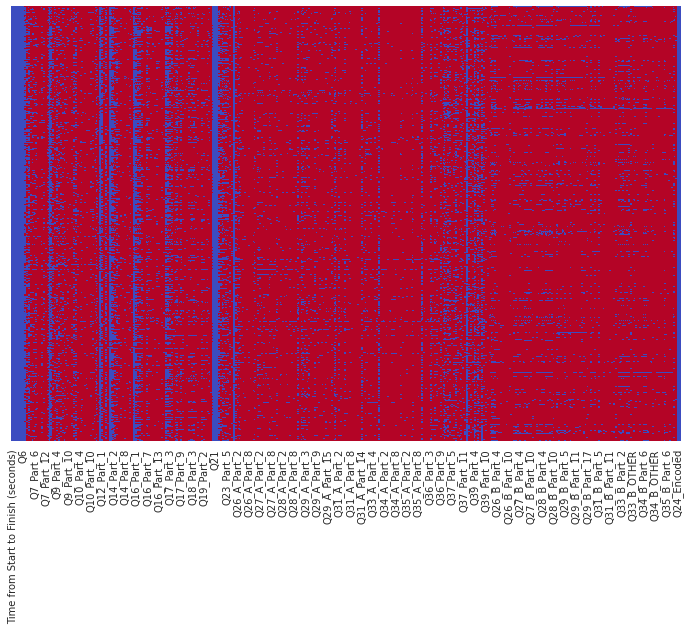

In [ ]:
# This heatmap shows visually the number of null values in the dataset, red values represent null values
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [ ]:
# Data Cleaning so it can be used with Scikit model

# Substitute null values with most common occurances
# For number 8, 11, and 13 we see that one value makes up the majority of the columns values
df['Q8'].fillna(df['Q8'].mode()[0],inplace=True)
df['Q11'].fillna(df['Q11'].mode()[0],inplace=True)
df['Q13'].fillna(df['Q13'].mode()[0],inplace=True)
df['Q15'].fillna(df['Q15'].mode()[0],inplace=True)

# Drop null values - only 1% of values
df = df.dropna(subset=['Q25'])

# Drop columns - these values contain too many NAN values
df = df.drop(columns = ['Q30', 'Q32', 'Q38'])

In [ ]:
# Dummy encoding, all Null values are set to 0, the columns listed are the end
df = df.fillna(0)
df = pd.get_dummies(data=df, columns=['Q1', 'Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21','Q22','Q25'])

In [ ]:
df

,Time from Start to Finish (seconds),Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,...,Q11_None,Q11_Other,Q13_2-5 times,Q13_6-25 times,Q13_More than 25 times,Q13_Never,Q13_Once,Q15_1-2 years,Q15_10-20 years,Q15_2-3 years,Q15_20 or more years,Q15_3-4 years,Q15_4-5 years,Q15_5-10 years,Q15_I do not use machine learning methods,Q15_Under 1 year,Q20_0-49 employees,"Q20_10,000 or more employees","Q20_1000-9,999 employees",Q20_250-999 employees,Q20_50-249 employees,Q21_0,Q21_1-2,Q21_10-14,Q21_15-19,Q21_20+,Q21_3-4,Q21_5-9,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),Q25_$0 ($USD),Q25_$1-$99,"Q25_$10,000-$99,999","Q25_$100,000 or more ($USD)",Q25_$100-$999,"Q25_$1000-$9,999"
1,289287,Python,R,SQL,0,0,0,0,0,0,0,0,0,0,0,0,Visual Studio,0,PyCharm,0,0,Sublime Text,0,0,0,0,0,Colab Notebooks,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,860,0,0,0,0,0,Java,Javascript,0,0,Bash,0,0,0,0,0,0,Visual Studio Code (VSCode),0,0,Notepad++,Sublime Text,Vim / Emacs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,507,Python,0,SQL,0,0,0,0,0,0,Bash,0,0,0,0,0,0,0,PyCharm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,762,Python,0,SQL,0,0,0,0,0,0,Bash,0,0,0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",0,0,0,PyCharm,0,0,Sublime Text,Vim / Emacs,0,0,0,Kaggle Notebooks,Colab Notebooks,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,742,0,R,0,0,0,0,0,0,0,0,0,0,0,0,RStudio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,Python,0,0,0,C++,0,0,0,0,0,0,0,0,0,0,Visual Studio,0,PyCharm,0,0,Sublime Text,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
10726,5461,0,0,SQL,C,0,0,0,0,0,0,0,0,0,0,0,Visual Studio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
10727,238,Python,0,0,0,0,0,0,0,0,0,0,0,0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",0,0,0,PyCharm,0,0,0,0,0,0,0,0,Colab Notebooks,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10728,625,Python,0,SQL,C,0,Java,Javascript,0,0,0,0,0,0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,0,Visual Studio Code (VSCode),0,Spyder,0,Sublime Text,0,0,0,0,0,Colab Notebooks,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Remove the first column and clean the dataset
# Converts data to first bool of 1 and 0s, then converts to 0 
df_clean = df.drop(df.columns[0], axis=1).astype(bool).astype(int)

In [ ]:
# A1l values that aren't null (0) are set to 1
df_clean[df_clean != 0] = 1
df_clean

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q12_Part_1,...,Q11_None,Q11_Other,Q13_2-5 times,Q13_6-25 times,Q13_More than 25 times,Q13_Never,Q13_Once,Q15_1-2 years,Q15_10-20 years,Q15_2-3 years,Q15_20 or more years,Q15_3-4 years,Q15_4-5 years,Q15_5-10 years,Q15_I do not use machine learning methods,Q15_Under 1 year,Q20_0-49 employees,"Q20_10,000 or more employees","Q20_1000-9,999 employees",Q20_250-999 employees,Q20_50-249 employees,Q21_0,Q21_1-2,Q21_10-14,Q21_15-19,Q21_20+,Q21_3-4,Q21_5-9,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),Q25_$0 ($USD),Q25_$1-$99,"Q25_$10,000-$99,999","Q25_$100,000 or more ($USD)",Q25_$100-$999,"Q25_$1000-$9,999"
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
10726,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
10727,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10728,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Putting the target variable at the end
df_clean = df_clean.drop(columns=['Q24_Encoded','Q24_buckets']).join(df['Q24_Encoded'])

In [ ]:
df_clean

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q12_Part_1,...,Q11_Other,Q13_2-5 times,Q13_6-25 times,Q13_More than 25 times,Q13_Never,Q13_Once,Q15_1-2 years,Q15_10-20 years,Q15_2-3 years,Q15_20 or more years,Q15_3-4 years,Q15_4-5 years,Q15_5-10 years,Q15_I do not use machine learning methods,Q15_Under 1 year,Q20_0-49 employees,"Q20_10,000 or more employees","Q20_1000-9,999 employees",Q20_250-999 employees,Q20_50-249 employees,Q21_0,Q21_1-2,Q21_10-14,Q21_15-19,Q21_20+,Q21_3-4,Q21_5-9,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),Q25_$0 ($USD),Q25_$1-$99,"Q25_$10,000-$99,999","Q25_$100,000 or more ($USD)",Q25_$100-$999,"Q25_$1000-$9,999",Q24_Encoded
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,10.0
2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1.0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,11.0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,7.0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0.0
10726,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1.0
10727,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0
10728,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0


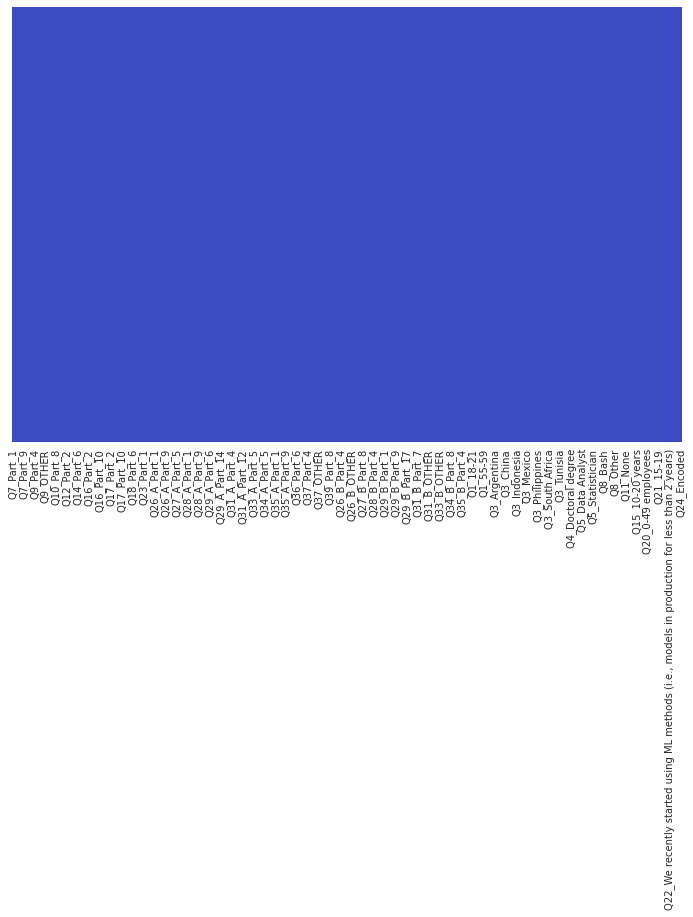

In [ ]:
# Add visual representation to show no more null values are in the dataset
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_clean.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

**Exploratory Data Analysis**

In [ ]:
# Visualizing the order of feature importance
df_feature_selection = df_clean.corr()

In [ ]:
# List the top 10 most important features with positive correlation with respect to Q24_Encoded
# Start with 1 since index 0 would be the values of Q24_encoded

# From here, we can see that working in the US has the highest correlation to a higher salary
# Other factors are how much the company spends on ML, experience, etc. 

df_feature_selection['Q24_Encoded'].sort_values(ascending=False)[1:101].head(10)

Q3_United States of America                                                                   0.522623
Q25_$100,000 or more ($USD)                                                                   0.290392
Q6_20+ years                                                                                  0.249140
Q22_We have well established ML methods (i.e., models in production for more than 2 years)    0.244413
Q23_Part_3                                                                                    0.227920
Q15_5-10 years                                                                                0.222806
Q21_20+                                                                                       0.214741
Q25_$10,000-$99,999                                                                           0.205571
Q26_A_Part_1                                                                                  0.202794
Q27_A_Part_1                                                             

Text(0, 0.5, 'Positive correlation value')

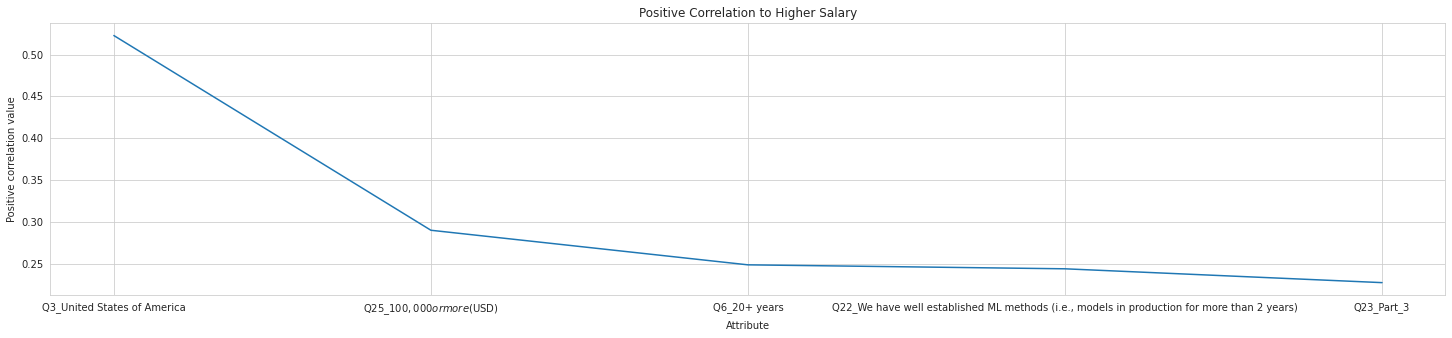

In [ ]:
# Visual representation of positive correlation values
plt.figure(figsize=(25,5))
plt.plot(df_feature_selection['Q24_Encoded'].sort_values(ascending=False)[1:101].head(5))
plt.title("Positive Correlation to Higher Salary")
plt.xlabel("Attribute")
plt.ylabel("Positive correlation value")

In [ ]:
# Manually select top 100 features with highest positive corr_coef with respect to Q24_Encoded
positive_corr = df_feature_selection['Q24_Encoded'].sort_values(ascending=False)[1:101].index
positive_corr = list(positive_corr)

In [ ]:
# List top 10 most important features with negative correlation with respect to Q24_Encoded
df_feature_selection['Q24_Encoded'].sort_values(ascending=True)[0:10].head(10)

# From here, we can see that working in India has the highest negative correlation to a higher salary
# Other factors are age, inexperience, etc. 

Q3_India             -0.271204
Q1_22-24             -0.226998
Q15_Under 1 year     -0.218463
Q20_0-49 employees   -0.212795
Q21_0                -0.191980
Q25_$0 ($USD)        -0.190683
Q6_1-2 years         -0.184470
Q1_25-29             -0.161483
Q29_B_Part_1         -0.157744
Q6_< 1 years         -0.155379
Name: Q24_Encoded, dtype: float64

In [ ]:
# Manually select top 100 features with highest negative corr_coef with respect to Q24_Encoded
negative_corr = df_feature_selection['Q24_Encoded'].sort_values(ascending=True)[0:100].index
negative_corr = list(negative_corr)

Text(0, 0.5, 'Negative correlation value')

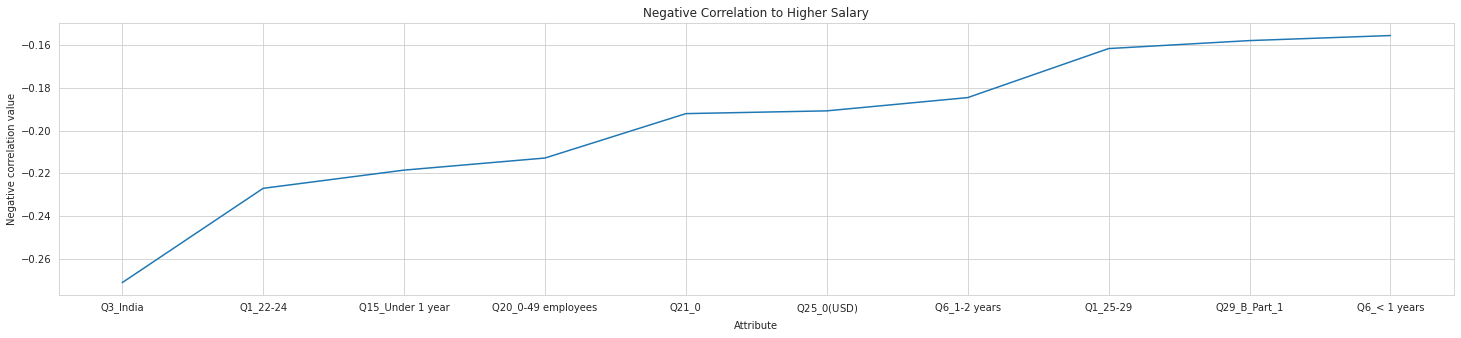

In [ ]:
# Visual representation of negative correlation values
plt.figure(figsize=(25,5))
plt.plot(df_feature_selection['Q24_Encoded'].sort_values(ascending=True)[0:100].head(10))
plt.title("Negative Correlation to Higher Salary")
plt.xlabel("Attribute")
plt.ylabel("Negative correlation value")

In [ ]:
# top 200 most important features with respect to Q24_Encoded plus target Q24_encoded (Cut number of features/columns by 60%) - 489 columns to 201
df_clean_reduction = df_clean[positive_corr].join(df_clean[negative_corr]).join(df_clean['Q24_Encoded'])
df_clean_reduction

,Q3_United States of America,"Q25_$100,000 or more ($USD)",Q6_20+ years,"Q22_We have well established ML methods (i.e., models in production for more than 2 years)",Q23_Part_3,Q15_5-10 years,Q21_20+,"Q25_$10,000-$99,999",Q26_A_Part_1,Q27_A_Part_1,Q6_10-20 years,Q9_Part_9,Q28_A_Part_10,Q7_Part_10,Q36_Part_9,Q23_Part_5,"Q20_10,000 or more employees",Q15_10-20 years,Q33_A_Part_7,"Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)",Q35_A_Part_10,Q15_20 or more years,Q29_A_Part_11,Q1_50-54,Q3_United Kingdom of Great Britain and Northern Ireland,Q15_4-5 years,Q4_Doctoral degree,Q29_A_Part_6,Q17_Part_3,Q10_Part_13,Q27_A_Part_2,Q29_A_Part_2,Q1_45-49,Q1_40-44,Q26_A_Part_2,Q23_Part_4,Q23_Part_2,Q27_A_Part_3,Q23_Part_1,Q14_Part_5,...,Q29_B_Part_16,Q28_B_Part_3,Q33_B_Part_2,Q29_B_Part_7,Q5_Data Analyst,Q27_B_Part_6,Q29_B_Part_14,Q27_B_Part_2,Q33_B_Part_4,Q3_Brazil,Q6_I have never written code,Q2_Woman,Q3_Russia,Q35_B_Part_9,Q35_B_Part_2,Q23_OTHER,Q34_B_Part_10,Q3_Pakistan,Q35_B_Part_6,Q29_B_Part_9,Q28_B_Part_5,Q35_B_Part_7,Q34_B_Part_4,Q39_Part_4,Q3_Indonesia,Q27_B_Part_3,Q33_B_Part_5,Q26_B_Part_9,Q3_Turkey,Q26_B_Part_6,Q35_B_Part_3,Q37_Part_7,Q28_B_Part_1,Q35_B_Part_4,Q3_Egypt,Q3_Other,Q31_B_Part_2,Q34_B_Part_2,"Q3_Iran, Islamic Republic of...",Q24_Encoded
1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10.0
2,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
3,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0
4,0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7.0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0
10726,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
10727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
10728,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0


**Model Implementation**

In [ ]:
# Split between training and test set

Salaries_Train,Salaries_Test = train_test_split(df_clean_reduction, test_size=0.3, random_state=0)
Salaries_Y = Salaries_Train['Q24_Encoded']
Salaries_X = Salaries_Train.drop(['Q24_Encoded'], axis=1)
Salaries_Y_Test = Salaries_Test['Q24_Encoded']
Salaries_X_Test = Salaries_Test.drop(['Q24_Encoded'], axis=1)

In [ ]:
# Model implementation - How many values are there?
df_clean_reduction['Q24_Encoded'].unique()

array([10.,  1., 11.,  7.,  3.,  9.,  0., 12.,  6., 14.,  4.,  2.,  8.,
        5., 13.])

In [ ]:
# Ordinal logistic regression, there are 15 salary buckets (ranging from 0 - 14 as int values), so would need 14 binary classifications
# First binary classication: any values > 0 is 1, rest is 0
# Second binary classication: any values > 1 is 1, rest is 0

Salaries_Y_list =[]

for i in range(14):
    Salaries_Y_temp = Salaries_Y.copy()
    if i>0:
        Salaries_Y_temp[Salaries_Y_temp == 1] = 0
    Salaries_Y_temp[Salaries_Y_temp > i] = 1
    Salaries_Y_temp[Salaries_Y_temp != 1] = 0
    Salaries_Y_list.append(Salaries_Y_temp.values.tolist())

In [ ]:
# Ordinal logistic regression using 10-fold cross validation

# Determining the best model coffieicient to use for test data based on training data
model_coef = []
model_intercept = []

# Number of salary buckets
for i in range(14):
  # Using training data
  X = Salaries_X
  y = pd.Series(Salaries_Y_list[i])

  model = LogisticRegression(max_iter = 1000)
  scaler = StandardScaler()
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X)

  # Empty array for F1 and accuracy scores for each bucket, space for each fold
  F1_table = np.zeros(10)
  accuracy = np.zeros(10)
  np_idx = 0

  # Cross validation 10-fold, split data into train and 'test'
  for train_idx, test_idx in kfold.split(X):
      X_train, X_test = X.values[train_idx], X.values[test_idx]
      y_train, y_test = y.values[train_idx], y.values[test_idx]
      
      # Normalization isn't required
      # X_train = scaler.fit_transform(X_train)
      # X_test = scaler.transform(X_test)
      
      model.fit(X_train, y_train)
      
      predictions = model.predict(X_test)
      
      TN = confusion_matrix(y_test, predictions)[0][0]
      FP = confusion_matrix(y_test, predictions)[0][1]
      FN = confusion_matrix(y_test, predictions)[1][0]
      TP = confusion_matrix(y_test, predictions)[1][1]

      F1_table[np_idx] = TP/(TP+0.5*(FP+FN))
      total = TN + FP + FN + TP
      ACC = (TP + TN) / float(total)
      
      accuracy[np_idx] = ACC*100
      np_idx += 1
      

  # store the logistic coefficient and intercept for each binary classification
  model_coef.append(model.coef_)
  model_intercept.append(model.intercept_)
      
  print ("Average F1 Score: {}({})".format(round(np.mean(F1_table),3),round(np.std(F1_table),3)))
  print ("Average accuracy Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

  # The average accuracy gets better after each fold and the variance decreases after each fold
  # The F1 score tends to decrease after each fold 
  # F1 is more accurate, for accuracy, if the data is skewed to low salaries and if the model says all feature provides low salaries, it is correct

Average F1 Score: 0.814(0.015)
Average accuracy Score: 77.781%(1.844%)
Average F1 Score: 0.781(0.015)
Average accuracy Score: 79.24%(1.335%)
Average F1 Score: 0.757(0.018)
Average accuracy Score: 80.538%(1.611%)
Average F1 Score: 0.741(0.025)
Average accuracy Score: 82.174%(1.643%)
Average F1 Score: 0.716(0.028)
Average accuracy Score: 83.579%(1.638%)
Average F1 Score: 0.708(0.033)
Average accuracy Score: 85.917%(1.51%)
Average F1 Score: 0.676(0.033)
Average accuracy Score: 86.755%(1.284%)
Average F1 Score: 0.665(0.03)
Average accuracy Score: 88.647%(1.096%)
Average F1 Score: 0.639(0.032)
Average accuracy Score: 89.417%(0.914%)
Average F1 Score: 0.594(0.025)
Average accuracy Score: 90.188%(0.813%)
Average F1 Score: 0.563(0.038)
Average accuracy Score: 93.729%(0.816%)
Average F1 Score: 0.42(0.062)
Average accuracy Score: 94.918%(0.669%)
Average F1 Score: 0.176(0.089)
Average accuracy Score: 97.378%(0.402%)
Average F1 Score: 0.051(0.079)
Average accuracy Score: 98.486%(0.537%)


**Model Tuning**

In [35]:
# Hyperparameters - Grid Searching

# Ordinal logistic regression using 10-fold cross validation
# Determining the best model coefficient to use for test data based on training data
model_coef = []
model_intercept = []

# Number of salary buckets
for i in range(14):

  # Training data
  X = Salaries_X
  y = pd.Series(Salaries_Y_list[i])

  model = LogisticRegression()
  scaler = StandardScaler()
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X)

  best_model = model
  best_params = {}
  best_F1 = 0
  best_std = 0

# C is a hyper parameter, shows the inverse of regularization strength to be applied
# Values were picked such that the model converges
  for C in [0.1,0.5,1,5,10]:

    # The type of solver used is also a hyper parameter, some methods will provide better results than others.
    # These methods have different norms used for calculations
    # Limited-memory Broyden–Fletcher–Goldfarb–Shanno - may not converge to anything
    # Stochastic Average Gradient, Sags is impractical for large N (because it remembers the most recently computed values for approximately all gradients). - Long computation times
    # Liblinear is used in 1 vs rest scenarios which is not useful here since this is a multi-class (Used to speed up computation time during coding session)
  
      for solver in ['newton-cg','liblinear']: # Use lbfgs
          
          # The number of maxiterations is also a hyper parameter
          model = LogisticRegression(C=C, solver=solver, max_iter=500)
          F1 = np.zeros(10)
          np_idx = 0
          
          for train_idx, test_idx in kfold.split(X):
              X_train, X_test = X.values[train_idx], X.values[test_idx]
              y_train, y_test = y.values[train_idx], y.values[test_idx]

              # X_train = scaler.fit_transform(X_train)
              # X_test = scaler.transform(X_test)

              model.fit(X_train, y_train)

              predictions = model.predict(X_test)

              TN = confusion_matrix(y_test, predictions)[0][0]
              FP = confusion_matrix(y_test, predictions)[0][1]
              FN = confusion_matrix(y_test, predictions)[1][0]
              TP = confusion_matrix(y_test, predictions)[1][1]
              
              #Calculating the F1_score
              F1[np_idx] = TP/(TP+0.5*(FP+FN))
              np_idx += 1
          
          # Grid search for best model
          if np.mean(F1) > best_F1:
              best_model = model
              best_params = {'C':C, 'solver':solver}
              best_F1 = np.mean(F1)
              best_std = np.std(F1)

  # The best coefficient and intercept for each binary classification is stored
  model_coef.append(best_model.coef_)
  model_intercept.append(best_model.intercept_)

  print (best_params)
  print ("Best Score: {}({})".format(round(best_F1,3),round(best_std,3)))      

  # It doesn't seem to work well with higher brackets, this is due to the skewed dataset of most people salary at the lower ends of the buckets

{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 0.815(0.014)
{'C': 5, 'solver': 'newton-cg'}
Best Score: 0.782(0.014)
{'C': 10, 'solver': 'liblinear'}
Best Score: 0.758(0.018)
{'C': 10, 'solver': 'liblinear'}
Best Score: 0.741(0.023)
{'C': 10, 'solver': 'liblinear'}
Best Score: 0.717(0.028)
{'C': 10, 'solver': 'newton-cg'}
Best Score: 0.71(0.029)
{'C': 10, 'solver': 'newton-cg'}
Best Score: 0.679(0.032)
{'C': 5, 'solver': 'liblinear'}
Best Score: 0.669(0.028)
{'C': 10, 'solver': 'liblinear'}
Best Score: 0.649(0.03)
{'C': 5, 'solver': 'liblinear'}
Best Score: 0.598(0.027)
{'C': 5, 'solver': 'newton-cg'}
Best Score: 0.569(0.037)
{'C': 10, 'solver': 'newton-cg'}
Best Score: 0.451(0.062)
{'C': 10, 'solver': 'liblinear'}
Best Score: 0.215(0.107)
{'C': 5, 'solver': 'newton-cg'}
Best Score: 0.09(0.1)


In [36]:
# Probability of belonging to each salary bucket for training data
# Each stored in probability_list
 
probability_list = []
# Find the probability of the training data belonging to each of the salary bucket for each data point
for j in range(len(Salaries_X)):
    # Ordinal logistic function
    ordinal = []
    # Perform for each salary bucket
    for i in range(14):
        temp = float(model_intercept[i])+np.dot(np.array(Salaries_X.values[j]), np.transpose(model_coef[i]))
        p = 1/(1+math.exp(-temp))
        ordinal.append(p)
    # Calculate probability of belonging to each salary bucket
    probability = []

    # Subtract the probability of next bucket since the buckets are cumulative
    for i in range(14):
        if i==0:
            probability.append(1-ordinal[i])
        else:
            probability.append(ordinal[i-1]-ordinal[i])
        if i==13:
            probability.append(ordinal[i])
    probability_list.append(probability)

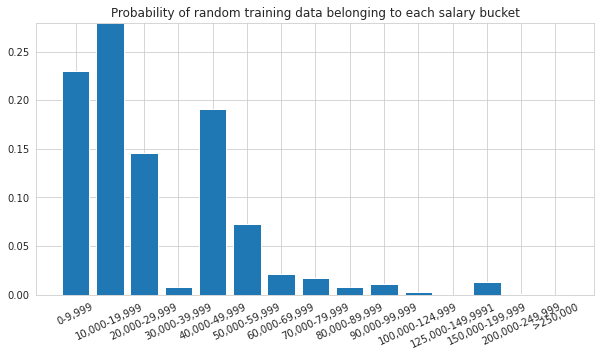

In [37]:
# Plotting probability of random test data belonging to each salary bucket
salary = ['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,9991','150,000-199,999','200,000-249,999','>250,000']
fig = plt.figure(figsize = (10, 5))
plt.bar(salary, probability_list[10])
plt.xticks(rotation=25)
plt.title('Probability of random training data belonging to each salary bucket')
plt.ylim(0,max(probability_list[10]))
plt.show()

In [38]:
# Prediction for which salary bucket it falls on based on max probability
prediction_ordinal = []
for j in range(len(Salaries_X)):
    prediction_ordinal.append(probability_list[j].index(max(probability_list[j])))

In [39]:
# Calculating the F1 and accuracy score using our training set model of which all the training data belong to

TN = confusion_matrix(Salaries_Y, prediction_ordinal)[0][0]
FP = confusion_matrix(Salaries_Y, prediction_ordinal)[0][1]
FN = confusion_matrix(Salaries_Y, prediction_ordinal)[1][0]
TP = confusion_matrix(Salaries_Y, prediction_ordinal)[1][1]

F1 = TP/(TP+0.5*(FP+FN))
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print("Training Set Accuracy Score: {}".format(round(ACC,3)))
print("Training Set F1 Score: {}".format(round(F1,3)))

Training Set Accuracy Score: 0.814
Training Set F1 Score: 0.243


**Test Data**

In [40]:
# Probability of belonging to each salary bucket for test data
# Each stored in probability_list

import math

probability_list = []
# Find the probability of the training data belonging to each of the salary bucket for each data point
for j in range(len(Salaries_X_Test)):
    # Ordinal logistic function
    ordinal = []
    # Perform for each salary bucket
    for i in range(14):
        temp = float(model_intercept[i])+np.dot(np.array(Salaries_X_Test.values[j]), np.transpose(model_coef[i]))
        p = 1/(1+math.exp(-temp))
        ordinal.append(p)
    # calculate probability of belonging to each salary bucket
    probability = []
    # Subtract the probability of next bucket since the buckets are cumulative
    for i in range(14):
        if i==0:
            probability.append(1-ordinal[i])
        else:
            probability.append(ordinal[i-1]-ordinal[i])
        if i==13:
            probability.append(ordinal[i])
    probability_list.append(probability)

In [41]:
# Prediction for which salary bucket it falls on is based on max probability
prediction_ordinal = []
for j in range(len(Salaries_X_Test)):
    prediction_ordinal.append(probability_list[j].index(max(probability_list[j])))

In [42]:
# Calculating the F1 and accuracy score using our training set model of which all the test data belong to

TN = confusion_matrix(Salaries_Y_Test, prediction_ordinal)[0][0]
FP = confusion_matrix(Salaries_Y_Test, prediction_ordinal)[0][1]
FN = confusion_matrix(Salaries_Y_Test, prediction_ordinal)[1][0]
TP = confusion_matrix(Salaries_Y_Test, prediction_ordinal)[1][1]

F1 = TP/(TP+0.5*(FP+FN))
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print("Training Set Accuracy Score: {}".format(round(ACC,3)))
print("Training Set F1 Score: {}".format(round(F1,3)))

Training Set Accuracy Score: 0.79
Training Set F1 Score: 0.16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


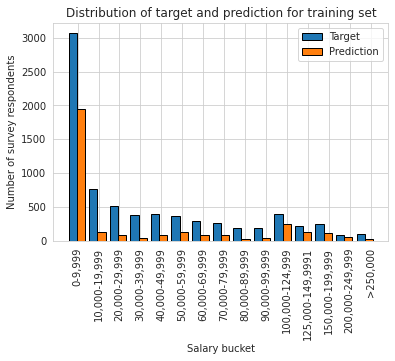

In [43]:
# Distribution of target variable values and their predictions on the training set
plt.hist([Salaries_Y,prediction_ordinal], bins=15, edgecolor='black', label=['Target', 'Prediction'])
plt.title("Distribution of target and prediction for training set")
plt.xlabel("Salary bucket")
plt.ylabel("Number of survey respondents")
plt.legend(loc='upper right')
plt.xticks(np.arange(0.5, 14.75, step=0.95),salary, rotation=90)
plt.show()

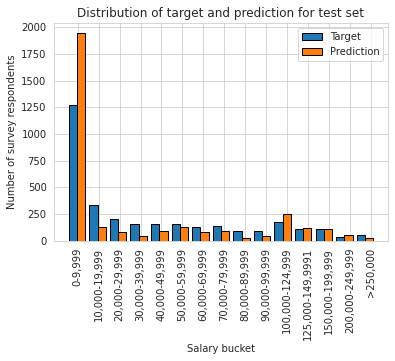

In [44]:
# Distribution of target variable values and their predictions on the test set
plt.hist([Salaries_Y_Test,prediction_ordinal], bins=15, edgecolor='black', label=['Target', 'Prediction'])
plt.title("Distribution of target and prediction for test set")
plt.xlabel("Salary bucket")
plt.ylabel("Number of survey respondents")
plt.legend(loc='upper right')
plt.xticks(np.arange(0.5, 14.75, step=0.95),salary, rotation=90)
plt.show()